In [49]:
#TAREA 5 - MINIMOS CUADRADOS
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
import scipy.optimize as spo
from IPython.display import clear_output
import time
import copy

El punto solución encontrado con minimos cuadrados es [1.42857143 0.42857143]


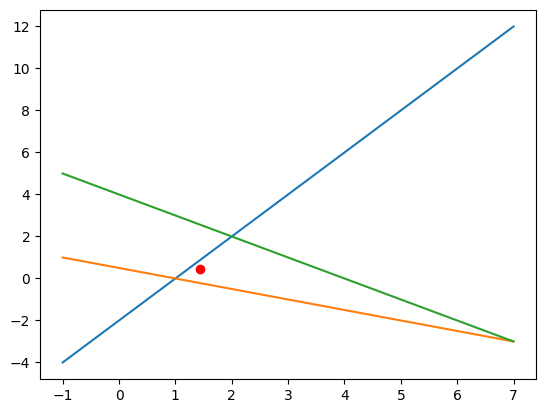

In [2]:
#Ejercicio 1
#a)
#Primero, ponemos el sistema de rectas en la forma Ax=b:
A = np.array([[2., -1.], [1., 2.], [1., 1.]])
b = np.array([2., 1., 4.])
#Hallamos la solución
x = np.linalg.inv(A.T @ A) @ A.T @ b
#Graficamos
x_valores = np.linspace(-1, 7, 400)

y1 = 2 * x_valores - 2
plt.plot(x_valores, y1, label='2x - y = 2')
y2 = (1 - x_valores) / 2
plt.plot(x_valores, y2, label='x + 2y = 1')
y3 = 4 - x_valores
plt.plot(x_valores, y3, label='x + y = 4')
plt.scatter(x[0], x[1], color="red", label='Punto solución')
print(f"El punto solución encontrado con minimos cuadrados es {x}")

In [3]:
#Interpretación: Este punto en común no es el punto de intersección de las tres rectas, como bien se ve en las gráficas.
# Como tal, las rectas no tienen ningún punto de intersección en común. Por lo tanto, se puede interpretar este resultado
# como el punto que está más cerca a las tres lineas.

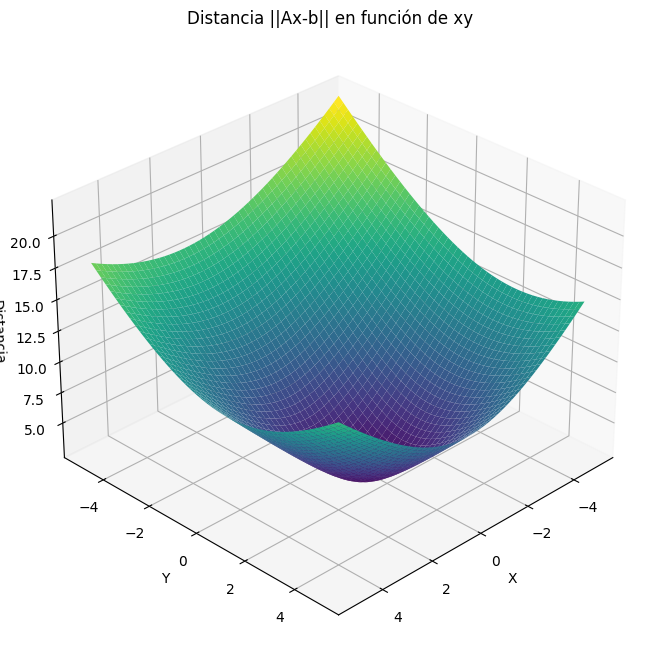

El punto solución minimizando la distancia es [1.42642643 0.42542543]


In [4]:
#b)
def Distancia(A,x,b):
    return np.linalg.norm(A@x - b)
x_rango = np.linspace(-5, 5, 1000)
y_rango = np.linspace(-5, 5, 1000) #Ponemos 1000 en el linspace porque h=0.01 y [5-(-5)]/h = 1000
minimo_distancia = np.inf
distancias = np.zeros((len(x_rango), len(y_rango)))
for i, x in enumerate(x_rango):
    for j, y in enumerate(y_rango):
        point = np.array([x, y])
        distancias[i, j] = Distancia(A, point, b)
        if Distancia(A, point, b) < minimo_distancia:
            minimo_distancia = Distancia(A, point, b)
            minimo = point
X, Y = np.meshgrid(x_rango, y_rango)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d',)
ax.plot_surface(X, Y, distancias, cmap='viridis')
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Distancia')
ax.set_title('Distancia ||Ax-b|| en función de xy')
plt.show()
print(f"El punto solución minimizando la distancia es {minimo}")

In [5]:
#Ambos métodos dieron el mismo punto común de las tres lineas, x=1.42 y y=0.42

In [7]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/")
!ls

 DatosRegresion.csv   MinimosCuadrados.ipynb	   MinimosLineal.txt
 Exponencial.dat      MinimosCuadraticoTarea.txt   Minimos_Optimize.ipynb
 MediaMovilData.csv   MinimosCuadratico.txt	   MultiLineal.ipynb
 MediaMovil.ipynb     MinimosLinealTarea.txt	  'Tarea 5 - Minimos Cuadrados.ipynb'


In [10]:
#Ejercicio 2

In [11]:
file2 = '/content/drive/MyDrive/Colab Notebooks/MinimosLinealTarea.txt'
file2

'/content/drive/MyDrive/Colab Notebooks/MinimosLinealTarea.txt'

In [12]:
data2 = pd.read_csv(file2,sep=' ')
data2.columns = ['x','y']
data2


,x,y
0,0.000000,-4.786585
1,1.052632,-4.065870
2,2.105263,0.179649
3,3.157895,2.719807
4,4.210526,2.878523
5,5.263158,4.527426
6,6.315789,8.827734
7,7.368421,10.977220
8,8.421053,11.799440
9,9.473684,14.529310


In [13]:
x2 = np.array(data2['x'])
y2 = np.array(data2['y'])

In [14]:
def GetFit(x,y,n):

  l = x.shape[0]
  b = y

  A = np.ones((l,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  # Ajuste
  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  xsol = np.linalg.solve(AT,bT)

  return xsol

In [15]:
xsol2 = GetFit(x2,y2,1)

In [16]:
def GetModel(x,p):
  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n

  return y

In [17]:
x_grafica2 = np.linspace(np.min(x2),np.max(x2),50)
y_grafica2 = GetModel(x_grafica2,xsol2)

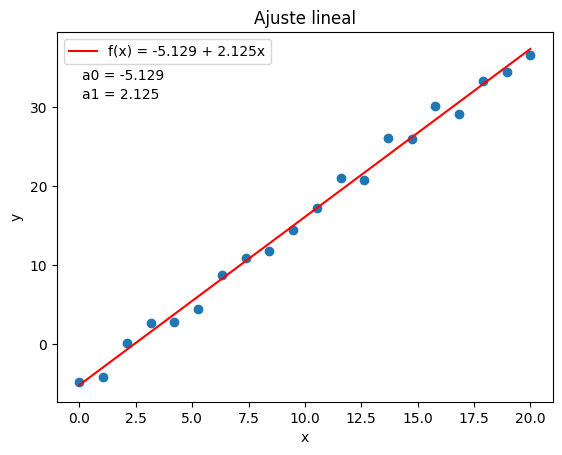

In [18]:
plt.scatter(x2,y2)
plt.text(0.05, 0.90, f"a0 = {round(xsol2[0],3)}", transform=plt.gca().transAxes, fontsize=10, ha='left', va='top')
plt.text(0.05, 0.85, f"a1 = {round(xsol2[1],3)}", transform=plt.gca().transAxes, fontsize=10, ha='left', va='top')
plt.plot(x_grafica2, y_grafica2, color='r', label = f"f(x) = {round(xsol2[0],3)} + {round(xsol2[1],3)}x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste lineal')
plt.legend()
plt.show()

In [19]:
#Ejercicio 3

In [20]:
file3 = '/content/drive/MyDrive/Colab Notebooks/MinimosCuadraticoTarea.txt'
file3

'/content/drive/MyDrive/Colab Notebooks/MinimosCuadraticoTarea.txt'

In [21]:
data3 = pd.read_csv(file3,sep=' ')
data3.columns = ['x','y']
data3

,x,y
0,0.000000,-3.348886
1,0.526316,10.779000
2,1.052632,13.127210
3,1.578947,21.208790
4,2.105263,20.632230
5,2.631579,34.110890
6,3.157895,60.666440
7,3.684211,55.078880
8,4.210526,81.895980
9,4.736842,96.834380


In [22]:
x3 = np.array(data3['x'])
y3 = np.array(data3['y'])

In [23]:
xsol3 = GetFit(x3,y3,2)

In [24]:
x_grafica3 = np.linspace(np.min(x3),np.max(x3),50)
y_grafica3 = GetModel(x_grafica3,xsol3)

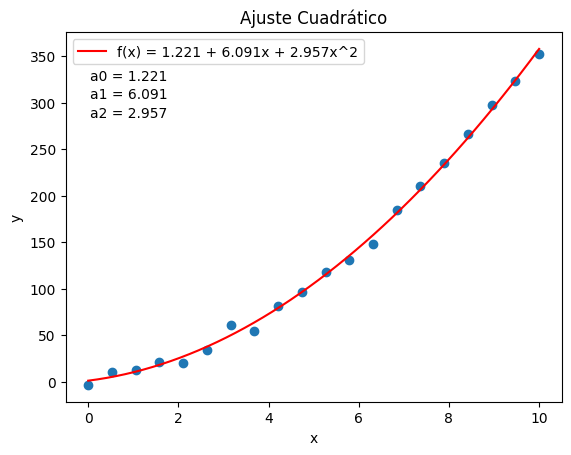

In [25]:
plt.scatter(x3,y3)
plt.text(0.05, 0.90, f"a0 = {round(xsol3[0],3)}", transform=plt.gca().transAxes, fontsize=10, ha='left', va='top')
plt.text(0.05, 0.85, f"a1 = {round(xsol3[1],3)}", transform=plt.gca().transAxes, fontsize=10, ha='left', va='top')
plt.text(0.05, 0.80, f"a2 = {round(xsol3[2],3)}", transform=plt.gca().transAxes, fontsize=10, ha='left', va='top')
plt.plot(x_grafica3, y_grafica3, color='r', label = f"f(x) = {round(xsol3[0],3)} + {round(xsol3[1],3)}x + {round(xsol3[2],3)}x^2")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Cuadrático')
plt.legend()
plt.show()

In [26]:
#Ejercicio 4


In [27]:
def modelo2(x, a, b):
    return a * x + b
def modelo3(x, a, b, c):
    return a * x**2 + b * x + c
xsol2_4,_ = spo.curve_fit(modelo2, x2, y2)
xsol3_4,_ = spo.curve_fit(modelo3, x3, y3)
y_grafica2_4 = modelo2(x_grafica2,xsol2_4[0],xsol2_4[1])
y_grafica3_4 = modelo3(x_grafica3,xsol3_4[0],xsol3_4[1],xsol3_4[2])

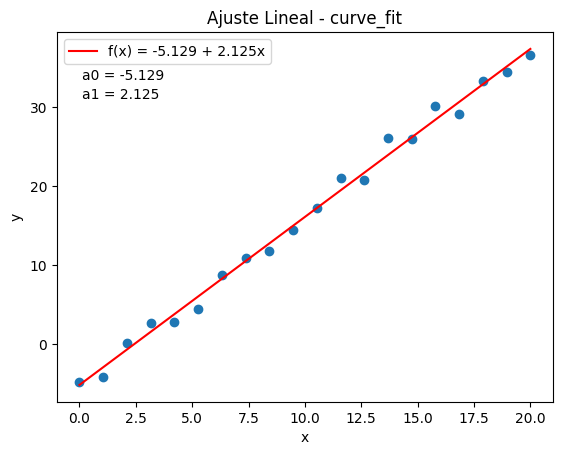

In [28]:
plt.scatter(x2,y2)
plt.text(0.05, 0.90, f"a0 = {round(xsol2_4[1],3)}", transform=plt.gca().transAxes, fontsize=10, ha='left', va='top')
plt.text(0.05, 0.85, f"a1 = {round(xsol2_4[0],3)}", transform=plt.gca().transAxes, fontsize=10, ha='left', va='top')
plt.plot(x_grafica2, y_grafica2_4, color='r', label = f"f(x) = {round(xsol2_4[1],3)} + {round(xsol2_4[0],3)}x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Lineal - curve_fit')
plt.legend()
plt.show()

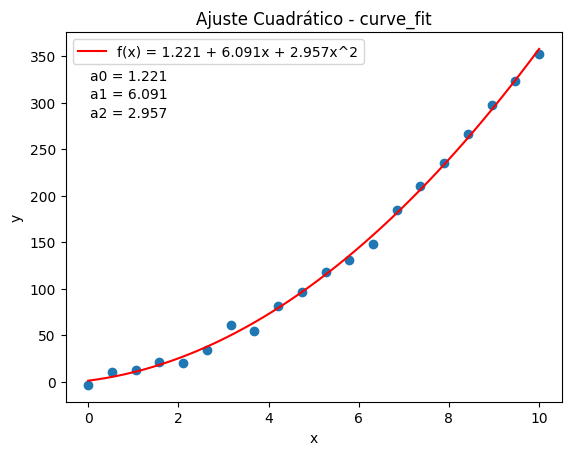

In [29]:
plt.scatter(x3,y3)
plt.text(0.05, 0.90, f"a0 = {round(xsol3_4[2],3)}", transform=plt.gca().transAxes, fontsize=10, ha='left', va='top')
plt.text(0.05, 0.85, f"a1 = {round(xsol3_4[1],3)}", transform=plt.gca().transAxes, fontsize=10, ha='left', va='top')
plt.text(0.05, 0.80, f"a2 = {round(xsol3_4[0],3)}", transform=plt.gca().transAxes, fontsize=10, ha='left', va='top')
plt.plot(x_grafica3, y_grafica3_4, color='r', label = f"f(x) = {round(xsol3_4[2],3)} + {round(xsol3_4[1],3)}x + {round(xsol3_4[0],3)}x^2")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Cuadrático - curve_fit')
plt.legend()
plt.show()

In [30]:
#Comparandolo con los métodos anteriores, nos damos cuenta que el método curve_fit da los mismos resultados para ajustes que
#el método de minimos cuadrados que implementamos en los ejercicios 2 y 3.

In [31]:
#Ejercicio 7
#a)
A7 = np.array([[3., 1., -1], [1., 2., 0.], [0., 1., 2.], [1., 1., -1.]])
b7 = np.array([-3., -3., 8., 9.])
x7 = np.linalg.inv(A7.T @ A7) @ A7.T @ b7
print(f"La proyección ortogonal de b (calculada con mínimos cuadrados) sobre el subespacio generado por esos vectores es {np.round(A7 @ x7)}")

La proyección ortogonal de b (calculada con mínimos cuadrados) sobre el subespacio generado por esos vectores es [-2.  3.  4.  0.]


In [32]:
#b)
def gram_schmidt(v1, v2, v3):
    vectors = [v1, v2, v3]
    orthonormal_vectors = []
    for v in vectors:
        for u in orthonormal_vectors:
            proj = np.dot(v, u) / np.dot(u, u) * u
            v = v - proj
        v /= np.linalg.norm(v)
        orthonormal_vectors.append(v)

    return np.array(orthonormal_vectors)

u1 = np.array([3., 1., 0., 1.])
u2 = np.array([1., 2., 1., 1.])
u3 = np.array([-1., 0., 2., -1.])
v = gram_schmidt(u1, u2, u3)

c = np.array([b7 @ v[0], b7 @ v[1], b7 @ v[2]])

proy = np.round(c[0]*v[0] + c[1]*v[1] + c[2]*v[2])

print(f"La proyección ortogonal de b (calculada con Grand-Schmidt) sobre el subespacio generado por esos vectores es {proy}")

La proyección ortogonal de b (calculada con Grand-Schmidt) sobre el subespacio generado por esos vectores es [-2.  3.  4.  0.]


In [33]:
#Ejercicio Lennard Jones

In [78]:
#En el archivo adjunto se hizo con 10000 épocas (vease).